<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_classification_RandomForest_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
base = pd.read_csv('/content/wine.csv')

In [3]:
base.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
base.tail()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
base.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
x_base = base.iloc[:,1:13].values
y_base = base.iloc[:,0].values

In [7]:
x_base.shape

(178, 12)

In [8]:
y_base.shape

(178,)

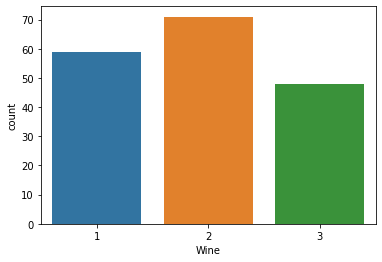

In [9]:
sns.countplot( x = base['Wine']);

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
x_base_treino, x_base_teste, y_base_treino, y_base_teste = train_test_split(x_base, y_base, test_size=0.30, random_state=0)

In [12]:
x_base_treino.shape

(124, 12)

In [17]:
y_base_treino.shape

(124,)

In [18]:
x_base_teste.shape

(54, 12)

In [19]:
y_base_teste.shape

(54,)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [22]:
rf.fit(x_base_treino,y_base_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [23]:
previsao= rf.predict(x_base_teste)
previsao

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3])

In [24]:
y_base_teste

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3])

In [26]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_base_teste,previsao)

0.9259259259259259

excelente acurácia usando o algoritimo de Random Forest

0.9259259259259259

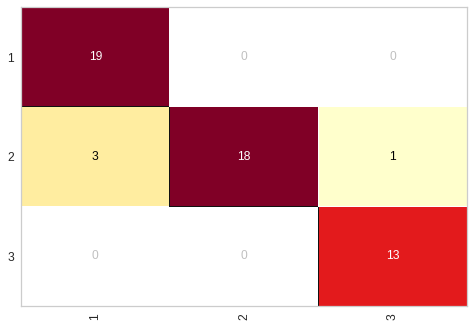

In [28]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(x_base_treino, y_base_treino)
cm.score(x_base_teste, y_base_teste)

matriz de confusão mostrando cada parte de acerto e erro

In [29]:
print(classification_report(y_base_teste,previsao))

              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       1.00      0.82      0.90        22
           3       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54



Veja todos os detalhes do algoritimo